<a href="https://colab.research.google.com/github/joaovifonseca/exercicio-pratico-analise-esteira/blob/main/VC_EP1_Primeiros_Passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando as bibliotecas

In [36]:
import numpy as np
import cv2 as cv
import matplotlib as mpl
from matplotlib import pyplot as plot
import math

Lendo a imagem e alterando a ordem das bandas de cores BGR -> RGB

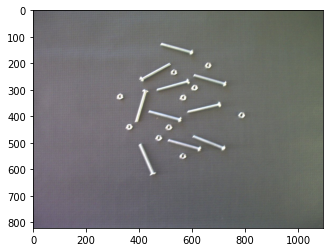

In [37]:
#lê a imagem
img_BGR = cv.imread("img01.jpg")
#altera a ordem das bandas de cores BGR para RGB
img_RGB = cv.cvtColor(img_BGR,cv.COLOR_BGR2RGB)
#exibe a imagem
plot.imshow(img_RGB) 

Separando as bandas da imagem colorida

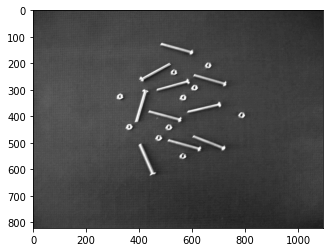

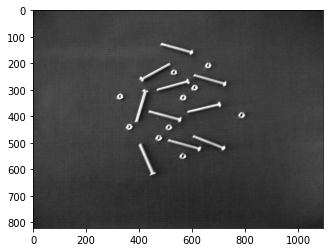

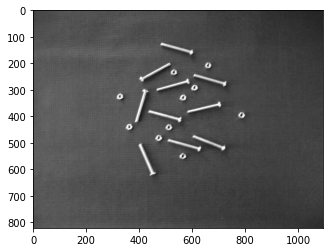

In [38]:
#faz split das bandas da imagem RGB
R, G, B = cv.split(img_RGB)
plot.imshow(R, cmap='gray')
plot.show()
plot.imshow(G, cmap='gray')#melhor resultado obtido
plot.show()
plot.imshow(B, cmap='gray')

Convertendo a imagem RGB para Grayscale (níveis de cinzas)

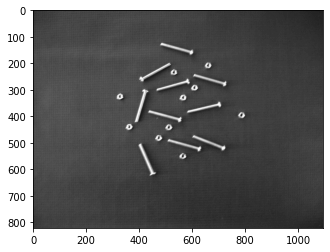

In [39]:
#obtem as dimensões da imagem (número de linhas e número de colunas)
num_lin = img_RGB.shape[0]
num_col = img_RGB.shape[1]
#cria uma matriz preenchida com zeros - nela serão armazenados os níveis de cinzas das médias computadas (R+G+B)/3   
img_gray=np.zeros((num_lin,num_col), dtype="uint8")
for l in range (num_lin):
     for c in range (num_col):
         (r, g, b) = img_RGB[l,c] 
         img_gray[l,c] = (int(r)+int(g)+int(b))//3
plot.imshow(img_gray,cmap='gray')

Convertendo a imagem Grayscale para Binária (2 níveis de cinzas 0 e 255)

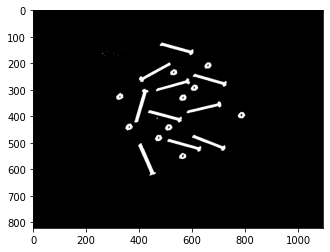

In [40]:
#define o limiar
thresh = 128

#aplica a função de limiarização  usando o limiar (thresh) definido
img_bin=cv.threshold(G, thresh, 255, cv.THRESH_BINARY)[1]

plot.imshow(img_bin,cmap='gray')

163.0


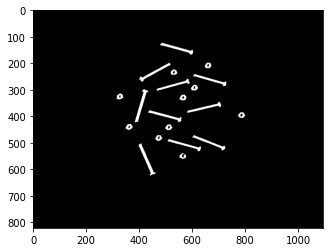

In [66]:
#aplica a função de limiarização  usando o método de Otsu, que define automaticamente o limiar
[thresh, img_bin] = cv.threshold(G, thresh, 255, cv.THRESH_OTSU) 
print(thresh)
plot.imshow(img_bin,cmap='gray')

## Observação: Até agora o melhor resultado foi obtido com a utilização da banda G e binarização pelo método de Otsu.

Análise de CCs usando rotinas do OpenCV

20
1207


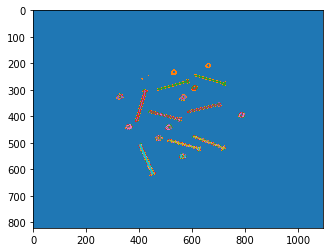

In [70]:
(numCCs, imgLabels, stats, centroids) = cv.connectedComponentsWithStats(img_bin, connectivity=8)
print(numCCs-1)
#print(stats)
#print(centroids)
plot.imshow(imgLabels, cmap='tab10')
#print(stats[1, [cv.CC_STAT_LEFT, cv.CC_STAT_TOP, cv.CC_STAT_WIDTH, cv.CC_STAT_HEIGHT, cv.CC_STAT_AREA]])
print(stats[1,cv.CC_STAT_AREA])

Análise de CCs usando algoritmo de pilha

In [73]:
#rotina para analisar componentes conexos (CCs)
def analisa_cc(b, l, c, viz):
    p=[]  #cria a lista vazia que servirá como pilha
    p.append([l,c])
    area_cc=0
    num_lin, num_col = b.shape
    b[l,c]=0; 
    area_cc=area_cc+1;
    while (len(p)>0):  
        l, c = p.pop()
        #pixels 4-conexos
        if (l+1<num_lin and b[l+1,c]==255): p.append([l+1,c]); area_cc=area_cc+1; b[l+1,c]=0 
        if (c-1>=0 and b[l,c-1]==255): p.append([l,c-1]); area_cc=area_cc+1; b[l,c-1]=0 
        if (l-1>=0 and b[l-1,c]==255): p.append([l-1,c]); area_cc=area_cc+1; b[l-1,c]=0 
        if (c+1<num_col and b[l,c+1]==255): p.append([l,c+1]); area_cc=area_cc+1; b[l,c+1]=0 
        #pixels 8-conexos (diagonais)
        if viz == 8:
            if (l+1<num_lin and c+1<num_col and b[l+1,c+1]==255): p.append([l+1,c+1]); area_cc=area_cc+1; b[l+1,c+1]=0                     #print(area_cc)
            if (l+1<num_lin and c-1>=0 and b[l+1,c-1]==255): p.append([l+1,c-1]); area_cc=area_cc+1; b[l+1,c-1]=0 
            if (l-1>=0 and c-1>=0 and b[l-1,c-1]==255): p.append([l-1,c-1]); area_cc=area_cc+1; b[l-1,c-1]=0 
            if (l-1>=0 and c+1<num_col and b[l-1,c+1]==255): p.append([l-1,c+1]); area_cc=area_cc+1; b[l-1,c+1]=0 
    return b, area_cc
#bloco para ler a imagem, limiarizar e chamar a rotina que analisa CCs
num_CCs = 0
area_cc = 0
img_bin = cv.threshold(G, thresh, 255, cv.THRESH_OTSU)[1] 
for l in range (img_bin.shape[0]):
  for c in range (img_bin.shape[1]):
    if img_bin[l,c] == 255:
      img_bin, area_cc = analisa_cc(img_bin, l, c, 9)          
      num_CCs = num_CCs +1
      print('CC', num_CCs, 'Area = ', area_cc)      

CC 1 Area =  1207
CC 2 Area =  351
CC 3 Area =  1218
CC 4 Area =  328
CC 5 Area =  1119
CC 6 Area =  1079
CC 7 Area =  371
CC 8 Area =  1479
CC 9 Area =  375
CC 10 Area =  377
CC 11 Area =  1136
CC 12 Area =  1183
CC 13 Area =  346
CC 14 Area =  382
CC 15 Area =  362
CC 16 Area =  360
CC 17 Area =  1140
CC 18 Area =  1096
CC 19 Area =  1459
CC 20 Area =  304


## Obswervação: Com ambas as opções de vizinhanças (4 e 8) o resultado fica consistente, sendo possível identificar a quantidade exata de peças (20) e a diferença de área entre parafusos (cerca de 350) e porcas (acima de 1.100).